In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.drop("loan_id", axis=1, inplace=True)


In [6]:
df.isnull().sum()

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [8]:
X = df.drop(" loan_status", axis=1)
y = df[" loan_status"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Accuracy of Random Forest: 0.9824355971896955
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.96      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



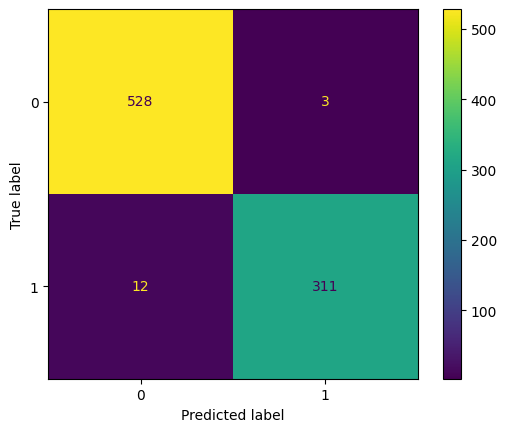

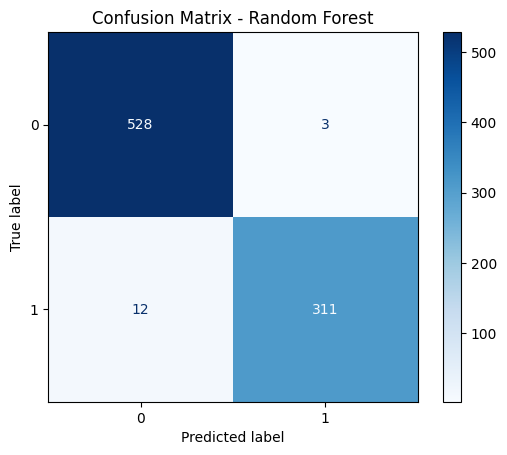

In [10]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


Approved Loans = 2656
Rejected Loans = 1613


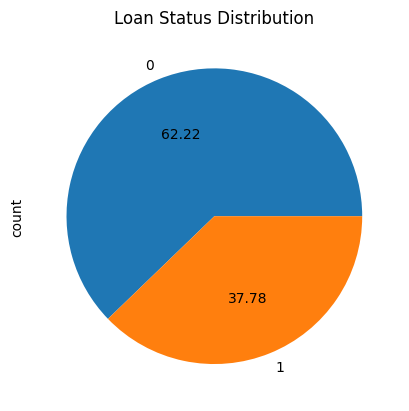

In [11]:
print("Approved Loans =", y.value_counts()[0])
print("Rejected Loans =", y.value_counts()[1])

y.value_counts().plot.pie(autopct="%.2f")
plt.title("Loan Status Distribution")
plt.show()


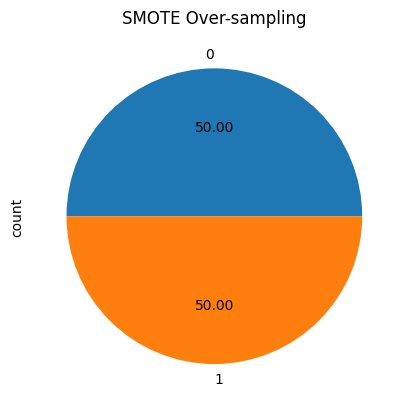

In [12]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

ax = y_resampled.value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("SMOTE Over-sampling")


In [13]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [14]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_re, y_train_re)

y_pred_lr = lr_model.predict(X_test_re)

print("Accuracy of Logistic Regression:", accuracy_score(y_test_re, y_pred_lr))
print("Classification Report:\n", classification_report(y_test_re, y_pred_lr))


Accuracy of Logistic Regression: 0.7563499529633114
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.84      0.78       532
           1       0.81      0.67      0.73       531

    accuracy                           0.76      1063
   macro avg       0.76      0.76      0.75      1063
weighted avg       0.76      0.76      0.75      1063



In [15]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_re, y_train_re)

y_pred_dt = dt_model.predict(X_test_re)

print("Accuracy of Decision Tree:", accuracy_score(y_test_re, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_re, y_pred_dt))


Accuracy of Decision Tree: 0.9830667920978363
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       532
           1       0.98      0.99      0.98       531

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



--- Logistic Regression Performance ---
Accuracy: 0.7563499529633114

--- Decision Tree Performance ---
Accuracy: 0.9830667920978363


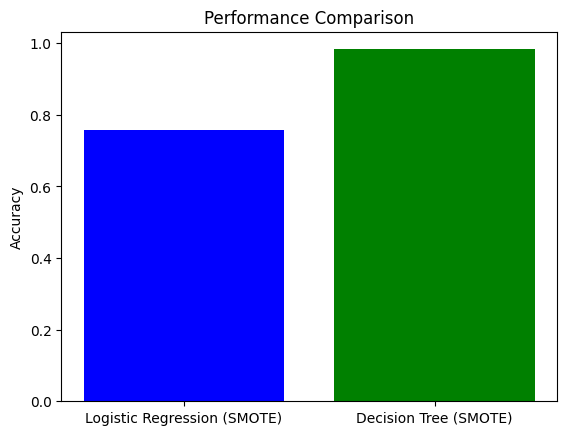

In [16]:
print("--- Logistic Regression Performance ---")
print("Accuracy:", accuracy_score(y_test_re, y_pred_lr))

print("\n--- Decision Tree Performance ---")
print("Accuracy:", accuracy_score(y_test_re, y_pred_dt))

plt.bar(
    ["Logistic Regression (SMOTE)", "Decision Tree (SMOTE)"],
    [accuracy_score(y_test_re, y_pred_lr), accuracy_score(y_test_re, y_pred_dt)],
    color=["blue", "green"]
)
plt.ylabel("Accuracy")
plt.title("Performance Comparison")
plt.show()


In [17]:
import pickle

filename = "decision_tree_model.pkl"
pickle.dump(dt_model, open(filename, "wb"))

print(f"Decision Tree model saved to {filename}")


Decision Tree model saved to decision_tree_model.pkl


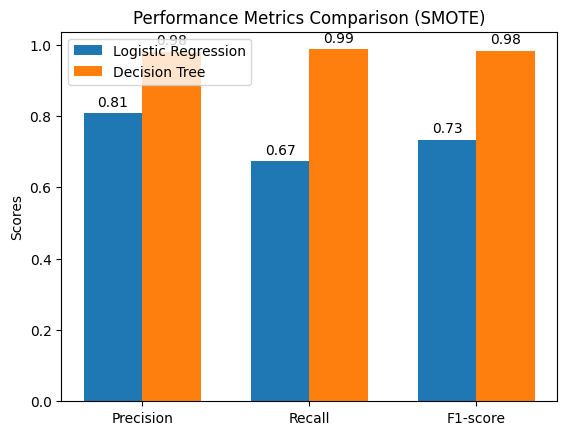

In [19]:
# Calculate metrics for Logistic Regression
precision_lr = precision_score(y_test_re, y_pred_lr)
recall_lr = recall_score(y_test_re, y_pred_lr)
f1_lr = f1_score(y_test_re, y_pred_lr)

# Calculate metrics for Decision Tree
precision_dt = precision_score(y_test_re, y_pred_dt)
recall_dt = recall_score(y_test_re, y_pred_dt)
f1_dt = f1_score(y_test_re, y_pred_dt)

# Prepare data for plotting
metrics = ["Precision", "Recall", "F1-score"]
lr_scores = [precision_lr, recall_lr, f1_lr]
dt_scores = [precision_dt, recall_dt, f1_dt]

x = np.arange(len(metrics))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_scores, width, label="Logistic Regression")
rects2 = ax.bar(x + width/2, dt_scores, width, label="Decision Tree")

# Add labels and formatting
ax.set_ylabel("Scores")
ax.set_title("Performance Metrics Comparison (SMOTE)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate values on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f"{height:.2f}",
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha="center", va="bottom")

plt.show()
# Save the plot as PNG
fig.savefig("models_metrics_comparison.png", dpi=300, bbox_inches="tight")
